In [0]:
import numpy as np                                
import pandas as pd                               
import seaborn as sns                             
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D

import pickle
from tqdm import tqdm_notebook as tqdm

%matplotlib inline                                

In [0]:
# mounting google drive in the remote system for accesing files in this google colab from your google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "drive/My Drive/PIKTORML/linear_regression/"

houseing_price.csv  linear_regression.ipynb


In [0]:
df = pd.read_csv('drive/My Drive/PIKTORML/linear_regression/houseing_price.csv',header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Column Name Info:

* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town
* CHAS: Charles River dummy variable(=1 if tact bounds river; 0 otherwise)
* NOX: nitric oxides concentration(parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property tax rate per 10,000 dollars
* PTRATIO: pupil-teacher ratio by town
* B[1000*(Bk-0.63)^2] where Bk is the proportion of blacks by town
* LSTAT: percetage lower status of the population
* MEDV: Median value of owner-occupied homes in $1000s






In [0]:
housing_colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = housing_colnames
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [0]:
# function to visualise the relationship between each features with the target price in form of scatter plot
def plotFeatures(col_list,title):
    plt.figure(figsize=(10, 14))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(7,2,i)
        plt.plot(df[col],df["MEDV"],marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.tight_layout()

13


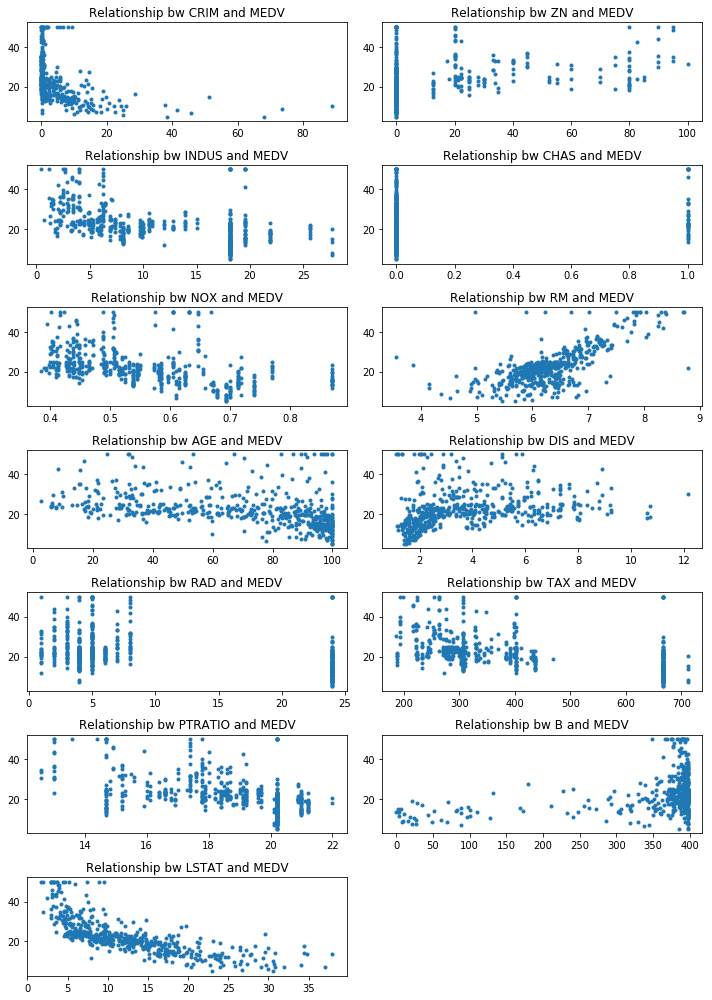

In [0]:
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
plotFeatures(colnames,"Relationship bw %s and MEDV")

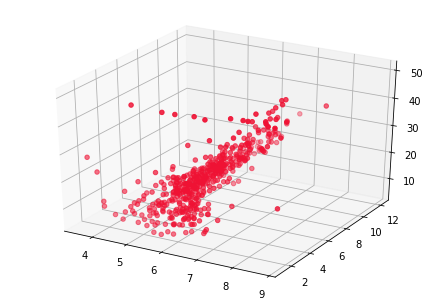

In [0]:
# plotting the scatter plot with two variables
# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.RM, df.DIS, df.MEDV, color='#ef1234')
plt.show()

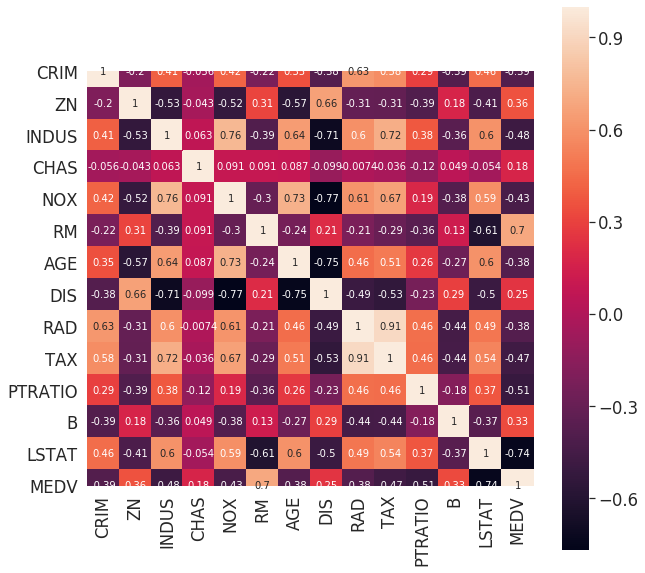

In [0]:
# another way to visualise the relationship between each features and target price is to plot the correlation of features and target variable with each other using heatmap of seaborn.
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

In [0]:
# so we will consider the RM feature here for predicting the MEDV value, as we can see from the correlation graph that this feature vary linearly as compared to other features.
# initializations

m = len(df.RM)
x0 = np.ones(m)
X = np.array([x0, df.RM]).T

# Initial Coefficients
B = np.array([0, 0])
Y = np.array(df.MEDV)
alpha = 0.03                     # learning rate

In [0]:
# defining the cost function
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [0]:
# checking the initial cost with initial co-efficients
inital_cost = cost_function(X, Y, B)
print(inital_cost)

296.0734584980237


In [0]:
# abline is a utility function to make graphs after every 1000 iteration to visualise the fitted line.
def abline(x,theta,Y):
    """Plot a line from slope and intercept"""
    
    y_vals = x.dot(theta)
    plt.xlim(0, 20)
    plt.ylim(-10, 60)
    plt.xlabel('RM')
    plt.ylabel('MEDV')
    plt.gca().set_aspect(0.1, adjustable='datalim')
    plt.plot(x,Y,'.',x, y_vals, '-')
    plt.show()

In [0]:
# defining the gradient descent algorithm which keeps track of the cost for each iteration
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    theta_history = []
    m = len(Y)
    
    for iteration in range(iterations):
        h = X.dot(B)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        B = B - alpha * gradient
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        theta_history.append(B)
        
        if iteration%1000==0:
            print(f"Iteration: {iteration+1},Cost = {cost},theta = {B}")
            abline(X,B,Y)
        
    return B, cost_history, theta_history

Iteration: 1,Cost = 43.46226278077344,theta = [0.67598419 4.38285045]


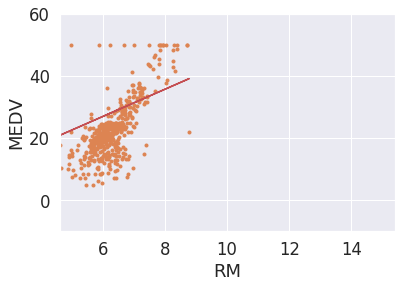

Iteration: 1001,Cost = 25.513714876495698,theta = [-10.11875893   5.24243183]


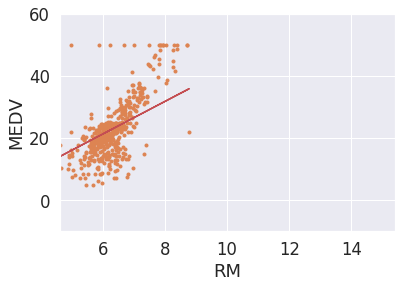

Iteration: 2001,Cost = 23.605006734460616,theta = [-17.55461178   6.41138559]


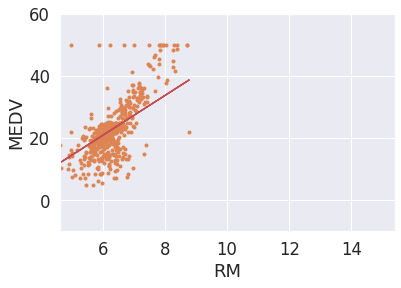

Iteration: 3001,Cost = 22.677374834794968,theta = [-22.73841923   7.22630641]


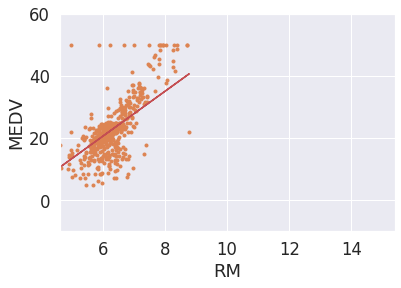

Iteration: 4001,Cost = 22.226545856636033,theta = [-26.35224271   7.79441778]


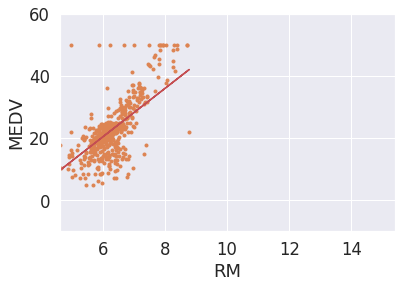

Iteration: 5001,Cost = 22.007443034038968,theta = [-28.87157243   8.19046918]


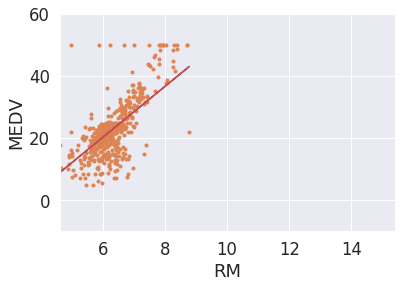

Iteration: 6001,Cost = 21.900959091799837,theta = [-30.62789016   8.46657123]


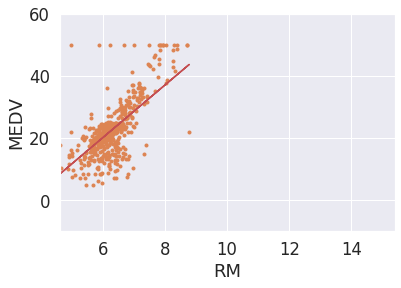

Iteration: 7001,Cost = 21.849207910229534,theta = [-31.85228406   8.65905216]


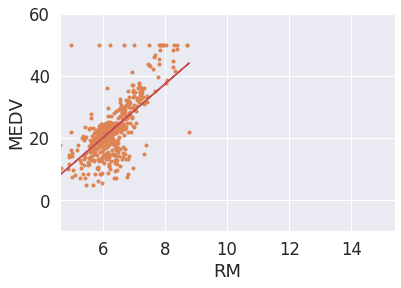

Iteration: 8001,Cost = 21.824056842964314,theta = [-32.70585424   8.79323772]


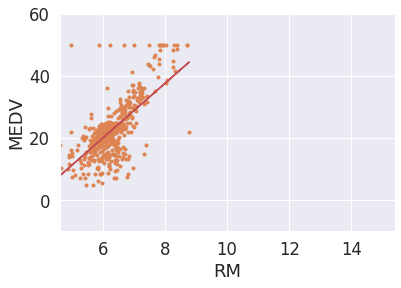

Iteration: 9001,Cost = 21.811833427664695,theta = [-33.30090951   8.88678343]


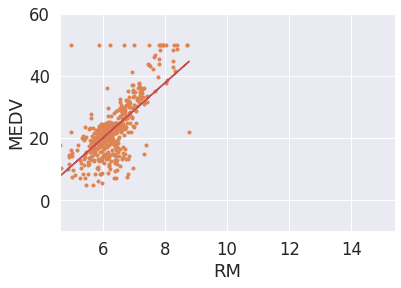

In [0]:
# 100000 Iterations
newB, cost_history, theta_history = gradient_descent(X, Y, B, alpha, 10000)